# <font color='navygray'>MF013 Análisis de inversión:  Introducción a Algotrading</font>
Por Carlos Crespo Elizondo, MSF<br>
Clase del 28-10-20

## <font color='navygray'>Importar librerías</font>

In [1]:
import pandas as pd

## <font color='navygray'>1. Crear funciones</font>

In [ ]:
def funcion_sumar(x, y):
    suma = x + y
    
    return suma

In [ ]:
a = 10
b = 40
suma = a + b
print(suma)

In [ ]:
funcion_sumar(100,100)

In [ ]:
funcion_sumar(y = 50, x = 80)

In [ ]:
def funcion_multiplicar(x=10, y=8):
    mult = x * y  
    
    return mult

In [ ]:
funcion_multiplicar(2, 4)

In [ ]:
def funcion_multiplicar2(x=10, y=8):
    mult = x * y  
    print(mult)
    return mult

In [ ]:
x = funcion_multiplicar2()

In [ ]:
print(x)

### <font color='red'>Función para importar datos archivos de Bloomberg</font>

In [2]:
def importar_bloomberg(accion):
    
    url = f'http://bit.ly/oncedos-{accion}'
    
    columnas_a_importar = ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST']
    df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst = True, 
                 usecols = columnas_a_importar)

    df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis = 1,
          inplace = True)

    df.sort_index(inplace = True)
    
    return df

### <font color='red'>Función calcular retornos diarios</font>

In [ ]:
https://query1.finance.yahoo.com/v7/finance/download/KOFUBL.MX?period1=1572319677&period2=1603942077&interval=1d&events=history&includeAdjustedClose=true

In [ ]:
https://query1.finance.yahoo.com/v7/finance/download/KOFUBL.MX?period1=1572319677&period2=1603942077&interval=1mo&events=history&includeAdjustedClose=true

## <font color='navygray'>2. Importar Precios WALMEX</font>
Pasos:
1. Importar datos de internet, guardarlos en un DataFrame de pandas y gurdarlo como "__*df*__"
1. Formato del DataFrame:
    * Index: Columna de fechas
    * Fecha más antigua:  Index 0
    * Fecha más reciente:  Index -1
    * Nombre y órden de las columnas: "Apertura", "Maximo", "Minimo", "Cierre"$^+$
1. Crear una columna del DataFrame con los Retornos logarítmicos de los precios de cierre diarios
1. Realizar las siguientes gráficas:
    * Precios de cierre
    * Retornos diarios
    * Histograma de los retornos
1. Realizar una sola figura con las tres gráficas del punto anterior
<br><br>

__**NOTAS:__<br>
$+$ No te recomiendo utilizar acentos al momento de definir el nombre de variables, columnas, df, etc.

### <font color='navygray'>2.1 Importar datos de internet</font>

In [ ]:
import pandas as pd

In [ ]:
url = 'http://bit.ly/oncedos-walmex'
df = pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.tail(10)

In [ ]:
df.info()

### <font color='navygray'>2.2 Crear columna de retornos diarios</font>

In [ ]:
df = pd.read_csv(url, skiprows = 6)
df.head()

In [ ]:
df = pd.read_csv(url, skiprows = 6, index_col = 0)
df.head()

In [ ]:
df.info()

In [ ]:
df.sort_index(axis = 0, inplace = True)

In [ ]:
df.head()

In [ ]:
df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst=True)
df.head()

In [ ]:
df.sort_index(axis = 0, inplace = True)

In [ ]:
df.tail()

O-H-L-C
Apertura - Maximo - Minimo - Cierre

#### Borrar columnas

In [ ]:
borrar = ['Change', '% Change', 'Change.1', '% Change.1', 'Change.2', '% Change.2','Change.3', '% Change.3']
df.drop(borrar, axis = 1, inplace=True)
df.head()

#### Renombrar columnas

In [ ]:
df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
orden_columnas = ['Apertura', 'Maximo', 'Minimo', 'Cierre']
df = df.reindex(columns=orden_columnas)

In [ ]:
df.head()

### Importar de cero

In [ ]:
del df

In [ ]:
columnas_a_importar = ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST']
df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst = True, 
                 usecols = columnas_a_importar)

df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis = 1,
          inplace = True)

df.sort_index(inplace = True)

In [ ]:
df.head()

#### <font color='red'>Función para importar datos archivos de Bloomberg</font>

In [3]:
walmex = importar_bloomberg('walmex')

In [4]:
walmex.tail()

,Cierre,Apertura,Maximo,Minimo
Date,,,,
2019-09-30,58.48,58.41,58.99,58.34
2019-10-01,58.48,58.49,59.14,58.25
2019-10-02,57.40,58.18,58.19,57.10
2019-10-03,58.19,57.40,58.31,57.11
2019-10-04,58.92,58.08,59.05,57.96


### <font color='navygray'>2.3 Calcular retornos diarios</font>

$$RetLog = ln(Precio_n) - ln(Precio_{n-1}$$
$$RetLog = ln\frac{Precio_n}{Precio_{n-1}}$$

#### <font color='red'>Función calcular retornos diarios</font>

In [5]:
import numpy as np

In [7]:
walmex['Ret'] = np.log(walmex['Cierre']/walmex['Cierre'].shift(1))

In [8]:
walmex.head()

,Cierre,Apertura,Maximo,Minimo,Ret
Date,,,,,
2010-01-04,29.780,29.95,30.100,29.155,NaN
2010-01-05,30.365,29.78,30.585,29.690,0.019454
2010-01-06,30.365,30.35,30.500,30.145,0.000000
2010-01-07,29.805,30.50,30.500,29.755,-0.018614
2010-01-08,29.680,29.88,29.880,29.500,-0.004203


In [9]:
walmex.dropna(inplace=True)

In [37]:
walmex.tail()

,Cierre,Apertura,Maximo,Minimo,Ret
Date,,,,,
2019-09-30,58.48,58.41,58.99,58.34,0.002225
2019-10-01,58.48,58.49,59.14,58.25,0.000000
2019-10-02,57.40,58.18,58.19,57.10,-0.018641
2019-10-03,58.19,57.40,58.31,57.11,0.013669
2019-10-04,58.92,58.08,59.05,57.96,0.012467


In [41]:
np.exp(walmex['Ret'].sum())-1

0.9785090664875695

In [39]:
walmex['Cierre'].iloc[-1]/walmex['Cierre'].iloc[0] - 1

0.9403918985674298

### <font color='navygray'>2.4 Graficar</font>

#### <font color='navygray'>Precio de cierre</font>

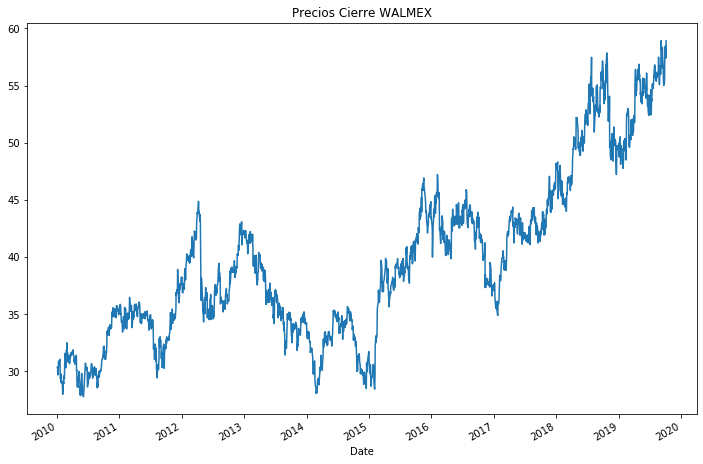

In [24]:
walmex['Cierre'].plot(figsize=(12,8), title='Precios Cierre WALMEX')

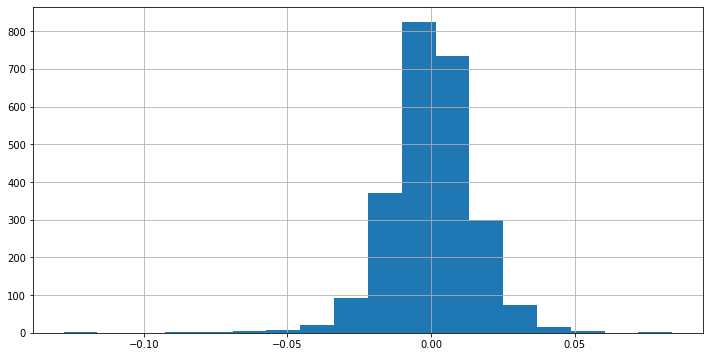

In [31]:
walmex['Ret'].hist(figsize=(12,6), bins = 18)

#### <font color='red'>Función graficar precios de cierre</font>

#### <font color='navygray'>Retornos</font>

#### <font color='red'>Función graficar retornos</font>

#### <font color='navygray'>Histograma</font>

#### <font color='red'>Función graficar histograma</font>

### <font color='navygray'>2.5 Multigráfica</font>

In [50]:
accion = 'AMXL'
url = f'https://query1.finance.yahoo.com/v7/finance/download/{accion}.MX?period1=1572319677&period2=1603942077&interval=1d&events=history&includeAdjustedClose=true'

In [51]:
df

In [52]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-29,15.59,15.69,15.41,15.51,15.142423,49390215
1,2019-10-30,15.55,15.57,15.38,15.46,15.093608,29003778
2,2019-10-31,15.48,15.48,15.18,15.24,14.878821,57789702
3,2019-11-01,15.27,15.48,15.19,15.46,15.093608,26632156
4,2019-11-04,15.50,15.76,15.50,15.59,15.220527,22668774
...,...,...,...,...,...,...,...
247,2020-10-22,14.18,14.18,13.78,13.92,13.920000,55580373
248,2020-10-23,13.98,13.98,13.66,13.69,13.690000,31836791
249,2020-10-26,13.65,13.67,13.29,13.43,13.430000,25263538
250,2020-10-27,13.42,13.42,13.18,13.28,13.280000,39241146


In [ ]:
accion.UPPER()